# PROJECT 2: INVESTIGATE A DATASET                                      Rohit Vinnakota

### INTRODUCTION

Project 2: Investigate a dataset

For this project, I will be using Titanic survivor data provided by Kaggle. I will tackle the question recommended by Udacity of “What factors made people more likely to survive”. The following will be my road map on how I solve this problem. I will explore 3 independent variables which I will determine based on a). Common sense as to whether the variable can affect survival data and b). The number of null entries. 

First checking for null entries:

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


#Reading the CSV file
titanic_data = pd.read_csv('titanic_data.csv')

# Using the sum and isNull() function to potentially eliminate certain variables
# from analysis
print(titanic_data.isnull().sum())          

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


As we can see, there are multiple variables that we may examine with no null values. Two obvious ones are Sex and Pclass. It seems unlikely that most other variables have any impact on who survived(variables with no null values)

Amongst variables with null values, Cabin can be ignored as 687/891 data values is missing. With that much missing data, it is not reasonable to draw a conclusion. 

For the "Embarked" variable, I beleive that it may have a bearing on the Cabin number. However, due to the large amount of missing data, it is hard to establish thier relationship. I will ignore this variable. 

I will include the age column in my analysis and will tacke it in two different ways(More details in the age analysis section)

Before starting on the analysis, I will delete all the data I will be ignoring. I also plan to do further wrangling but that will happen later.

In [2]:
titanic_data = titanic_data[['Sex','Survived','Age','Pclass']]
titanic_data.describe()  #Checking to see if all the values are deleted. The warning can be ignored as I have not tackled the NaN's yet

C:\Users\Rohit\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Survived,Age,Pclass
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,2.308642
std,0.486592,14.526497,0.836071
min,0.000000,0.420000,1.000000
25%,0.000000,NaN,2.000000
50%,0.000000,NaN,3.000000
75%,1.000000,NaN,3.000000
max,1.000000,80.000000,3.000000


To get a general idea as to how disastrous the sinking was, we can observe the survival rate for the overall data 

In [3]:
titanic_data.groupby('Survived').Survived.count()

Survived
0    549
1    342
Name: Survived, dtype: int64

Only 342 people survived the disaster. In terms of survival rate that is 38.38% as seen in Out[2]

### Question 1: What is the effect of Gender on survivability?

#### Hypothesis: It is highly likely that more females survived than males due to priorititazion during times of crisis, espicially a few decades ago. Men were probably expected to let women and children esacpe first. 

First, I will examine the "Sex" variable by itself. A simple graph in pandas to determine the total number of males and females yields: 

In [4]:
titanic_data.groupby('Sex').Sex.count()

Sex
female    314
male      577
Name: Sex, dtype: int64

There are 314 femals and 577 males on the ship. It makes more sense to check the percentage of genders who survived rather than the actual numbers

In [5]:
titanic_data.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

As we can see 74% of females made it out of the ship and only 19% of males did. There seems to be a significant correlation between gender and survivability. The same idea can be visualized like so: 

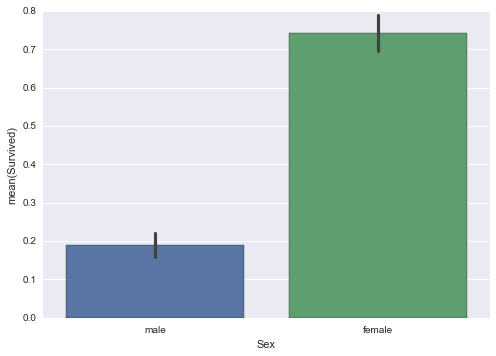

In [6]:
sns.barplot(data =titanic_data, x='Sex',y='Survived')

The difference can be further highlighted by a point plot:

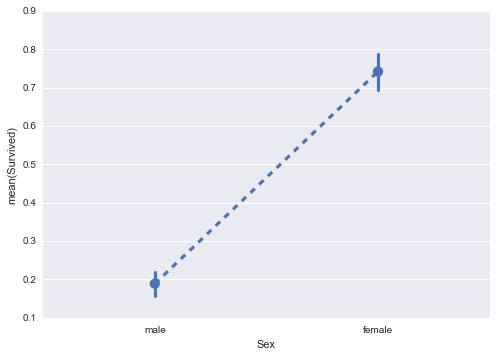

In [7]:
sns.pointplot(data = titanic_data, x='Sex',y='Survived',linestyles = '--')

As we can see, the survival rate for females is far higher than that of males. 

Next, we can explore whether the class of a person has any impact on the survival rate. 

## Question 2: What is the effect of a person's class on survivability?

#### Hypothesis: The upper classes probably had a higher survival rate as they might have been afforded extra luxuries and priviliges due to their high ticket cost. I would also hypothesize that a higher ticket cost might have secured the upper classes better cabins but due to the large amount of missing cabin data, it would be hard to veirfy this. 

First, we can figure out how many people there were in each class

In [8]:
titanic_data.groupby('Pclass').Survived.count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

As we can see, there were more people in Class 3 than Classes 1 and 2 which have around the same number of people. Since there are a different number of people in different classes, it makes more sense to check survival rates rather than compare survival numbers

In [9]:
titanic_data.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

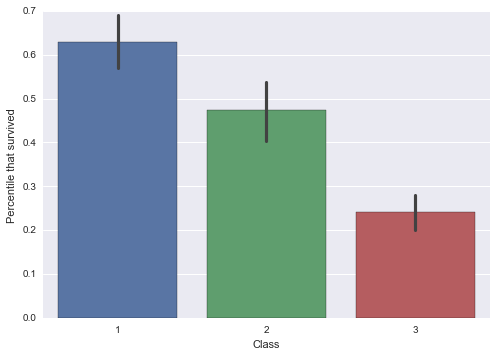

In [10]:
g1 = sns.barplot(data =titanic_data,x='Pclass',y='Survived')
g1.set(xlabel = 'Class', ylabel = 'Percentile that survived')

Class 1 has the highest survival rate, and the rate drops as the class number increases. It seems that the upper classes were prioritized during the time the ship was sinking. Similarly a point plot yields:

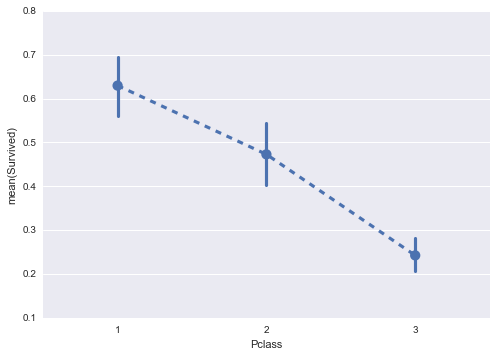

In [11]:
sns.pointplot(data =titanic_data,x='Pclass',y='Survived',linestyles ="--")

In [12]:
titanic_data.groupby(['Survived','Pclass']).Survived.count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Survived, dtype: int64

It is interesting that more people in Class 1 survived than Class 3 despite Class 1 having 275 less people than Class 3. 

## Question 3: What is the effect of a person's age on survivability?

#### Hypothesis: Younger people would probably have a higher survival rate. I hypothesize that people below 18 were probably evacuated first as the older people stayed onboard to rescue other. I also hypothesize that parents would probably make sure their children are safe first before securing their own safety. 

In order to group different ages, we can create different age groups. We will analyze 2 subsets of the titanic data. For the first subset, we will fill in a predicted age for individuals. For the second subset, we will eliminate the individuals will the null age entry. Hopefully, there is a minimal difference for both datasets.

In [13]:

original_data = titanic_data.copy()

In [14]:
print("Max age: ")
print(original_data.Age.max())
print("Min age:")
print(original_data.Age.min())

Max age: 
80.0
Min age:
0.42


Here the max age in 80 years and the minimum age is 0.42 years. We can create age groups to fill in an average age for the missing age values. I will use the average age combining gender and class and fill it in for the corresponding NaN values.

In [15]:
m1 = titanic_data.groupby(['Pclass','Sex']).Age.mean()
m1.head()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
Name: Age, dtype: float64

These are the average ages of the different genders and classes combined. I will fill in these ages in the Age column where the values are NaN. The original code replaced index values. The updated code uses the apply method to transform the dataframe

In [16]:
#Original code
"""titanic_data.fillna(value=0,inplace = True)
for x in range(len(titanic_data)):
    if titanic_data.iloc[x,2] == 0:
        if titanic_data.iloc[x,1] == 'male':
            if titanic_data.iloc[x,3] == 1:
                titanic_data.iloc[x,2] = dict1['1m']
            elif titanic_data.iloc[x,3] == 2:
                titanic_data.iloc[x,2] = dict1['2m']
            else:
                titanic_data.iloc[x,2] = dict1['3m']
        else:
            if titanic_data.iloc[x,3] == 1:
                titanic_data.iloc[x,2] = dict1['1f']
            elif titanic_data.iloc[x,3] == 2:
                titanic_data.iloc[x,2] = dict1['2f']
            else:
                titanic_data.iloc[x,2] = dict1['3f'] """


def age_applier(axis):
    if pd.isnull(axis['Age']):
        return m1[axis['Pclass'],axis['Sex']]
    else:
        return axis['Age']
    
titanic_data['Age'] =titanic_data.apply(age_applier, axis=1)

titanic_data.describe()



,Survived,Age,Pclass
count,891.000000,891.000000,891.000000
mean,0.383838,29.318643,2.308642
std,0.486592,13.281103,0.836071
min,0.000000,0.420000,1.000000
25%,0.000000,21.750000,2.000000
50%,0.000000,26.507589,3.000000
75%,1.000000,36.000000,3.000000
max,1.000000,80.000000,3.000000


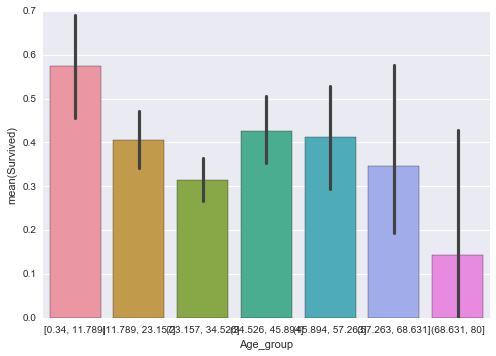

In [17]:
titanic_data['Age_group'] = pd.cut(titanic_data['Age'], bins= 7, include_lowest=True)
g2 = sns.barplot(data =titanic_data,x='Age_group',y='Survived',orient =0)
sns.set_context("poster",font_scale=0.6)

With our estimated data filled in, we see that age groups 0.34 years to 11.789 years have a high survival rate and the middle aged people have a higher survival rate than the rest. This would make sense as the older people may have been less physically able to rescue themselves. This could also imply that the rescue prioritized women and children first. In order to further emphasize the above finding, I will investigate the data with the missing ages removed. 

The advantage of this is we can use original data. However we will have a smaller sample size. We will use the original_data dataframe created prior to achieve this.

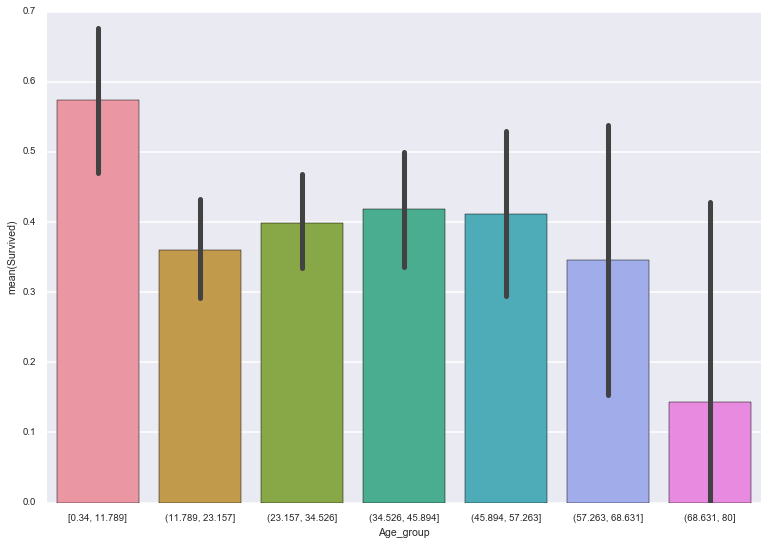

In [18]:
original_data = original_data.dropna(subset=['Age'])
original_data['Age_group'] = pd.cut(original_data['Age'], bins= 7, include_lowest=True)
g3 = sns.barplot(data =original_data,x='Age_group',y='Survived',orient =0)
sns.set_context("poster",font_scale=0.6)

As we can see, the predicted data was a good prediction since the survival rates for the ages with a smaller sample size is still very close to the predicted survival rates. The only difference occurs in the (11.789,23.157] bin. Thus we can conclude that children and middle aged people had a higher survival rate. 

Using the above findings, it is reasonable to conclude that a female child belonging to class 1 would theoritically have the highest survival rate. We can also say the following statements with a good degree of confidence

-->People belonging to class 1 have a higher survival rate than other classes
-->Females have a higher survival rate than males
-->Middle aged people have a higher survival rate than older people

## Further Discussion and Limitations

The following are reasonable conclusions for each of my Questions

1) Females have a higher survival rate than males

2) The upper class has a higher surviavl rate than the lower classes

3) Children below 11 have a high survial rate

Given the missing cabin data, one can determine if the port embarked on had any bearing on their cabin number. One could also determine if cabin number was determined by class and would be able to make an educated guess as to whether only classes correlate to survival rate, or if they were also affected by cabin number and port embarked.

To further solidify these conclusions, a chi-square test of association can be performed to test against the Null hypothesis that there is a dependence between Survival rate and Gender,Pclass,and Age bracket(if we consider each age bracket as a category of the Age variable). and 'Survived' is considered categorical. Should the p-value be lower than our confidence level, we would reject the null hypothesis and accept the alternative hypothesis. Should the alternative hypothesis be accepted, we can confidently say that there is a correlation between survivability and the variable we are considering as the descriptive graphs in this project only strongly imply correlation, not confirm it. 

The project attempts to determine a relationship between survivability and a person's broadly general qualities.  The following featuers may also have some effect on survivability should there be some way to measure them

--> Size of rooms

--> Nationality

--> Occupation of passenger 

--> Ethnicity

--> Physical capabilities of the person

--> Location of person on the ship

I believe that the factor that determined whether a person survived is a combination of all these variables. Certain factors may have a higher effect on survivability but it may be impossible to predict with 100% accuracy if a given person would survive or not even if we have access to all these attributes for every person. 

Our accuracy may naturally go up if there were more passengers aboard the Titanic. Even though we almost have a 1000 points in the dataset, a greater number of passengers will enable us to handle missing values more efficiently. 

I only explored 3 questions for this project. The following questions are also valid from the data we have.

--> Do families have a greater rate of survival? We can determine if individuals who looked out for themselves had a higher chance of escaping or if families were given priority for escaping. 

--> Is there any evidence of Simpson's paradox? Perhaps certain trends that appear in the overall dataset do not appear in a subset(Example: A certain age group may have higher survival rate amongst males than females). We can use this to develop insights into that population category. 

Sources
http://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-the-column-in-panda-data-frame

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

https://stanford.edu/~mwaskom/software/seaborn/tutorial/distributions.html

http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.cut.html

http://stackoverflow.com/questions/34251641/how-to-make-a-bar-plot-of-non-numerical-data-in-pandas

http://www.titanicandco.com/inside.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

http://stackoverflow.com/questions/29293369/pandas-fillna-with-a-lookup-table